In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#定义损失函数
def loss(X,y,w):
    vector=y-np.dot(X,w)
    return np.sqrt((vector*vector).sum())      #求平方和

In [9]:
#定义求梯度函数，这里省事直接用微分估计梯度，实际上应该严格按照数值微分来求解
def grad(loss,X,y,w):
    det=np.zeros([2,1])
    w_temp=np.zeros([2,1])
    for i in range(w.shape[0]):
        w_temp[:,:]=w[:,:]
        w_temp[i,0]=w_temp[i,0]-0.01
        det[i,0]=(loss(X,y,w)-loss(X,y,w_temp))/0.01
        if det[i,0]>1:
            det[i,0]=1
        elif det[i,0]<-1:        #遇到了梯度爆炸的情况，进行梯度裁剪
            det[i,0]=-1
    return det

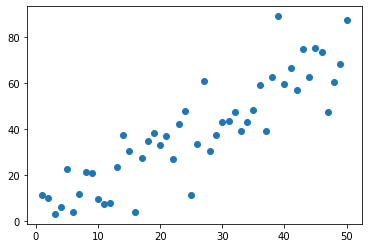

In [10]:
#通过在真实值的基础上增加扰动来创建数据集
X=np.zeros([50,2])
X[:,0]=np.linspace(1,50,50)
X[:,1]=1
w=np.array([[1.5],[1]])
y=np.dot(X,w)+np.random.normal(loc=0,scale=10,size=(50,1))
plt.scatter(X[:,0],y);

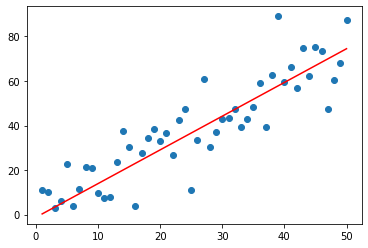

In [11]:
w0=np.random.normal(loc=0,scale=1,size=(2,1))     #随机产生参数初始值
lr=0.1   #学习率
N=50   #迭代代数
for i in range(N):
    w0=w0-lr*grad(loss,X,y,w0)
plt.plot(X[:,0],np.dot(X,w0),color='red');
plt.scatter(X[:,0],y);